## Q6. Como identificar e tratar outliers em uma coluna numérica usando desvio padrão ou quartis?

# Identificação e Tratamento de Outliers em Python:

**Sumário**
1. [Introdução](#introdução)  
2. [Método do Desvio Padrão (Z-Score)](#método-do-desvio-padrão-z-score)  
3. [Método do IQR (Quartis)](#método-do-iqr-quartis)  
4. [Tratamento de Outliers](#tratamento-de-outliers)  
5. [Exemplos de Gráficos](#exemplos-de-gráficos)

---

## Introdução

Outliers são valores atípicos que podem distorcer análises estatísticas e modelos preditivos. Existem diversas abordagens para tratar esse problema e abaixo duas dessas abordagens são utilizadas para **identificação** e **tratamento** de outliers em uma coluna numérica:

- **Z-Score (Desvio Padrão)**  
- **IQR (Intervalo Interquartílico)**  

Em seguida, são apresentados exemplos em Python com visualizações (histograma, boxplot e scatter).

---

## Método do Desvio Padrão (Z-Score)

1. Calcule a **média** (μ) e o **desvio padrão** (σ).  
2. Para cada valor $x_i$, calcule o **Z-Score**:

$$
z_i \;=\;\frac{x_i - \mu}{\sigma}
$$

3. Defina um **limiar** (por exemplo, $|z_i| > 3$ ou $|z_i| > 2$).  
4. Valores com $|z_i|$ acima do limiar são considerados outliers.  

---

## Método do IQR (Quartis)

1. Calcule o **1º quartil** \(Q1\) (percentil 25) e o **3º quartil** \(Q3\) (percentil 75).  
2. Calcule o **IQR**:  
   \[
     IQR = Q3 - Q1
   \]
3. Determine os limites:  
   - **Limite inferior**: \(Q1 - 1.5 \times IQR\)  
   - **Limite superior**: \(Q3 + 1.5 \times IQR\)  
4. Valores fora desses limites são outliers.

---

## Tratamento de Outliers

Existem 03 possibilidades principais no tratamento de Outliers:

- **Remoção**: descartar registros com outliers.  
- **Winsorização**: limitar o valor ao máximo ou mínimo permitido (colar no limite).  
- **Imputação**: substituir outliers por mediana, média ou outro valor plausível.

---

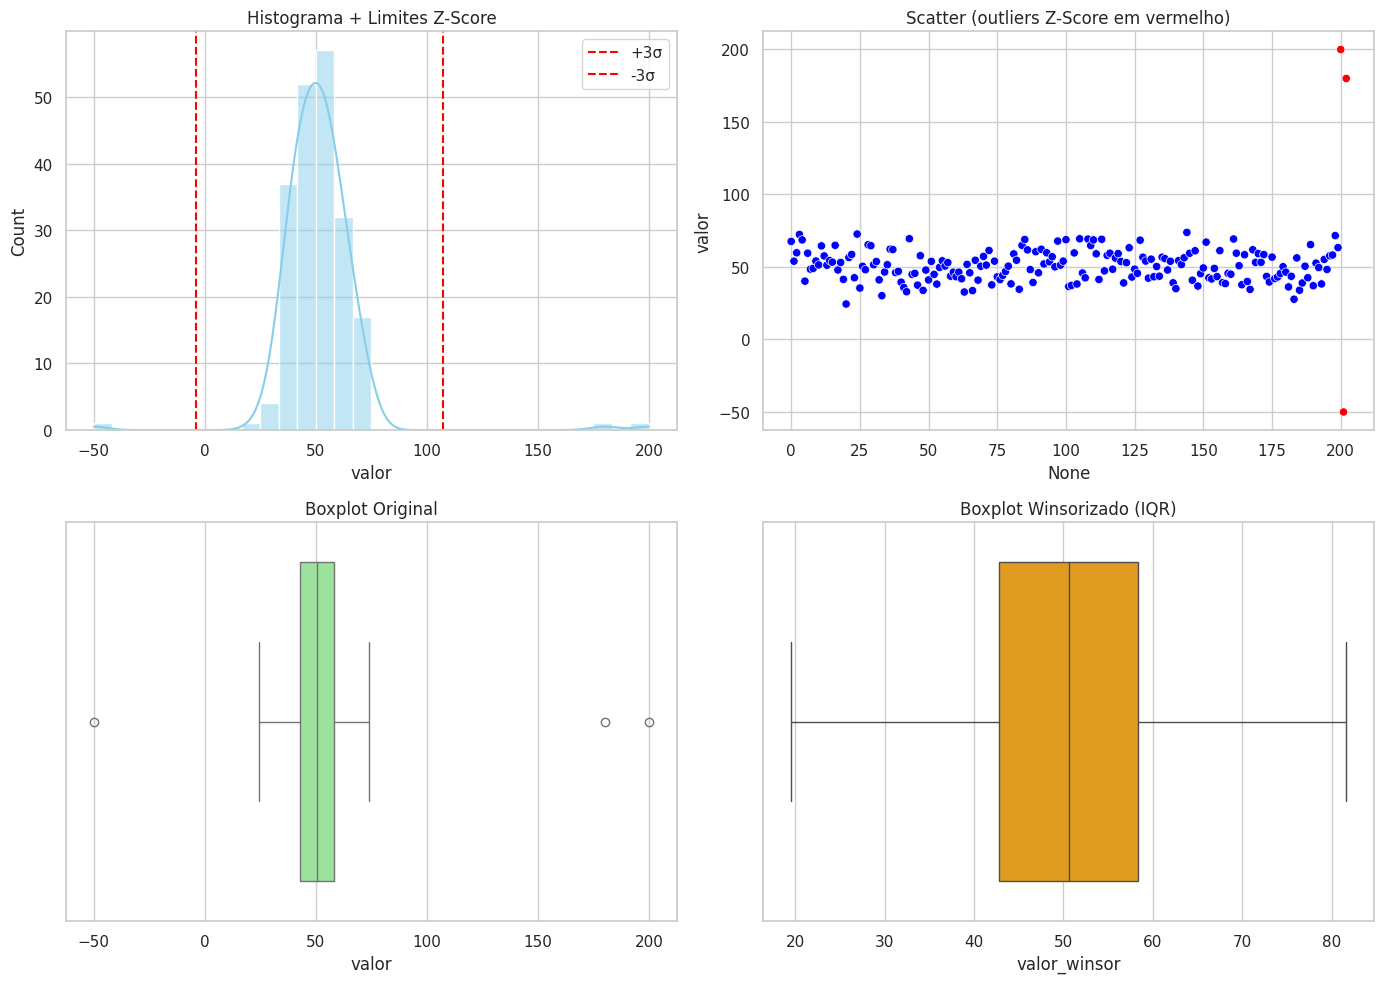

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(0)

# Gerando dados de exemplo
data = pd.DataFrame({
    'valor': np.concatenate([
        np.random.normal(loc=50, scale=10, size=200),
        [200, -50, 180]  # outliers artificiais
    ])
})

# Cálculo do Z-Score
mean = data['valor'].mean()
std = data['valor'].std()
limiar_z = 3
data['z_score'] = (data['valor'] - mean) / std
mask_outliers_z = data['z_score'].abs() > limiar_z

# Cálculo do IQR
Q1 = data['valor'].quantile(0.25)
Q3 = data['valor'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
mask_outliers_iqr = (data['valor'] < lim_inf) | (data['valor'] > lim_sup)

# Tratamentos
df_sem_out_z = data.loc[~mask_outliers_z, :].copy()              # Remoção pelo Z-Score
data['valor_winsor'] = data['valor'].clip(lower=lim_inf, upper=lim_sup)  # Winsorização pelo IQR

# Grid 2x2 de gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma + linhas de limiar Z-Score
sns.histplot(data['valor'], bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].axvline(mean + limiar_z * std, color='red', linestyle='--', label=f'+{limiar_z}σ')
axes[0, 0].axvline(mean - limiar_z * std, color='red', linestyle='--', label=f'-{limiar_z}σ')
axes[0, 0].set_title("Histograma + Limites Z-Score")
axes[0, 0].legend()

# Scatter plot destacando outliers pelo Z-Score
sns.scatterplot(x=data.index, y='valor', data=data,
                hue=mask_outliers_z, palette={False: 'blue', True: 'red'},
                legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Scatter (outliers Z-Score em vermelho)")

# Boxplot original
sns.boxplot(x=data['valor'], color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title("Boxplot Original")

# Boxplot winsorizado via IQR
sns.boxplot(x=data['valor_winsor'], color='orange', ax=axes[1, 1])
axes[1, 1].set_title("Boxplot Winsorizado (IQR)")

plt.tight_layout()
plt.show()



##Q7. Como concatenar vários DataFrames (empilhando linhas ou colunas), mesmo que tenham colunas diferentes? Dica: Utiliza-se pd.concat() especificando axis=0 (linhas) ou axis=1 (colunas). Quando há colunas diferentes, os valores ausentes são preenchidos com NaN.


## Como concatenar DataFrames com pandas (pd.concat())

É possível concatenar vários DataFrames, empilhando linhas ou colunas, mesmo quando as colunas são diferentes, usando pd.concat() do pandas:

- axis=0 (padrão): empilha linhas (um DataFrame abaixo do outro)
- axis=1: empilha colunas (um ao lado do outro)

Se existirem colunas diferentes, os valores ausentes são preenchidos automaticamente com NaN.

In [3]:
import pandas as pd
from typing import List

def concat_dataframes(
    dfs: List[pd.DataFrame],
    axis: int = 0,
    ignore_index: bool = False,
    join: str = "outer"
) -> pd.DataFrame:
    """
    Concatena uma lista de DataFrames.

    Args:
        dfs: lista de DataFrames
        axis: 0 para empilhar linhas, 1 para empilhar colunas
        ignore_index: renumera índice no resultado
        join: "outer" para união, "inner" para interseção

    Returns:
        DataFrame concatenado
    """
    return pd.concat(dfs, axis=axis, ignore_index=ignore_index, join=join)

def main() -> None:
    # Exemplo 1: axis=0, mesmas colunas
    df1 = pd.DataFrame({"id": [1, 2], "valor": [10, 20]})
    df2 = pd.DataFrame({"id": [3, 4], "valor": [30, 40]})
    print(">>> df1:\n", df1, "\n")
    print(">>> df2:\n", df2, "\n")
    resultado1 = concat_dataframes([df1, df2], axis=0, ignore_index=True)
    print(">>> Resultado 1 (df1 + df2):\n", resultado1, "\n")

    # Exemplo 2: axis=0, colunas diferentes
    df3 = pd.DataFrame({"id": [5, 6], "outra": ["A", "B"]})
    print(">>> df1:\n", df1, "\n")
    print(">>> df3:\n", df3, "\n")
    resultado2 = concat_dataframes([df1, df3], axis=0, ignore_index=True)
    print(">>> Resultado 2 (df1 + df3):\n", resultado2, "\n")

    # Exemplo 3: axis=1, mesmo índice
    df4 = pd.DataFrame({"nome": ["Ana", "Bruno"]}, index=[0, 1])
    df5 = pd.DataFrame({"idade": [25, 30]},        index=[0, 1])
    print(">>> df4:\n", df4, "\n")
    print(">>> df5:\n", df5, "\n")
    resultado3 = concat_dataframes([df4, df5], axis=1)
    print(">>> Resultado 3 (df4 ∥ df5):\n", resultado3, "\n")

    # Exemplo 4: axis=1, índices diferentes
    df6 = pd.DataFrame({"cidade": ["SP", "RJ"]}, index=[0, 2])
    print(">>> df4:\n", df4, "\n")
    print(">>> df6:\n", df6, "\n")
    resultado4 = concat_dataframes([df4, df6], axis=1)
    print(">>> Resultado 4 (df4 ∥ df6):\n", resultado4, "\n")

if __name__ == "__main__":
    main()



>>> df1:
    id  valor
0   1     10
1   2     20 

>>> df2:
    id  valor
0   3     30
1   4     40 

>>> Resultado 1 (df1 + df2):
    id  valor
0   1     10
1   2     20
2   3     30
3   4     40 

>>> df1:
    id  valor
0   1     10
1   2     20 

>>> df3:
    id outra
0   5     A
1   6     B 

>>> Resultado 2 (df1 + df3):
    id  valor outra
0   1   10.0   NaN
1   2   20.0   NaN
2   5    NaN     A
3   6    NaN     B 

>>> df4:
     nome
0    Ana
1  Bruno 

>>> df5:
    idade
0     25
1     30 

>>> Resultado 3 (df4 ∥ df5):
     nome  idade
0    Ana     25
1  Bruno     30 

>>> df4:
     nome
0    Ana
1  Bruno 

>>> df6:
   cidade
0     SP
2     RJ 

>>> Resultado 4 (df4 ∥ df6):
     nome cidade
0    Ana     SP
1  Bruno    NaN
2    NaN     RJ 



## Q8. Utilizando pandas, como realizar a leitura de um arquivo CSV em um DataFrame e exibir as primeiras linhas?


# Leitura de arquivo CSV com pandas

Para ler um arquivo CSV em um `DataFrame` do pandas e exibir as primeiras linhas, utilizamos o método `pd.read_csv()` junto com o atributo `.head()`.

## Sintaxe básica

```python
pd.read_csv(
    filepath_or_buffer: str,  # caminho para o arquivo CSV
    sep: str = ",",           # separador de colunas (default = ",")
    encoding: str = "utf-8",   # codificação do arquivo
    ...
) -> pd.DataFrame

df.head(n: int = 5) -> pd.DataFrame
# n é o número de linhas a exibir (default = 5)


In [5]:
import pandas as pd
from typing import List

def load_csv(
    source: str,
    sep: str = ",",
    encoding: str = "utf-8"
) -> pd.DataFrame:
    """
    Carrega um CSV de uma fonte local ou remota.

    Args:
        source (str): Caminho local ou URL do CSV.
        sep (str): Separador de colunas.
        encoding (str): Codificação do arquivo.

    Returns:
        pd.DataFrame: Dados lidos no DataFrame.
    """
    return pd.read_csv(source, sep=sep, encoding=encoding)

def main() -> None:
    # URL de exemplo: conjunto de dados Iris (seaborn)
    csv_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

    # Carrega o CSV remoto
    df = load_csv(csv_url)

    # Exibe as primeiras 5 linhas
    print("Primeiras linhas do DataFrame:\n")
    print(df.head())

if __name__ == "__main__":
    main()


Primeiras linhas do DataFrame:

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
# Versao sucinta que mostra pd.read_scv!
import pandas as pd

# lê o CSV e retorna um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
    )

# exibe as 5 primeiras linhas
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


##Q9. Utilizando pandas, como selecionar uma coluna específica e filtrar linhas em um “DataFrame” com base em uma condição?


# Seleção de colunas e filtragem de linhas em pandas (pd).

## 1. Seleção de Colunas
- `df['col']` → Retorna Series
- `df[['col1','col2']]` → Retorna DataFrame

## 2. Filtro de Linhas
- `df[condição]` → Filtra linhas
- `df.loc[condição, colunas]` → Filtro + seleção

## 3. Condições Comuns
```python
# Comparações
df['idade'] > 18

# Strings
df['nome'].str.contains('a')

# Combinações
(cond1) & (cond2)  # AND
(cond1) | (cond2)  # OR
~(cond)            # NOT
```

### Sintaxe básica (exemplos):
```python
df['coluna']           # Retorna uma Series (única coluna)
df[['col1', 'col2']]   # Retorna um DataFrame (múltiplas colunas)
df.loc[:, 'coluna']    # Seleção explícita por rótulo
df.loc[:, ['col1', 'col2']]
df[condição]                     # Filtro simples (todas colunas)
df.loc[condição, 'coluna']       # Filtro + coluna específica
df.loc[condição, ['col1','col2']] # Filtro + múltiplas colunas
df['idade'] > 18
df['salário'].between(2000, 5000)
df['pontuação'] != 0
df['nome'].str.contains('Silva')
df['email'].str.endswith('.com.br')
df['cidade'].str.upper() == 'SÃO PAULO'
 ```



In [7]:
import pandas as pd
from typing import Any

def main() -> None:
    """
    Demonstra como selecionar colunas e filtrar linhas em um DataFrame.
    """
    # Monta um DataFrame de exemplo
    data: dict[str, Any] = {
        'id':      [1,  2,    3,     4,      5],
        'idade':   [15, 22,   17,    30,     25],
        'nome':    ['Ana', 'Bruno', 'Carlos', 'Diana', 'Edu'],
        'salario': [2000, 3000, 1500,  4000,   3500]
    }
    df: pd.DataFrame = pd.DataFrame(data)

    # Exemplo 1: selecionar a coluna "idade"
    print("Exemplo 1 – Coluna idade:")
    print(df['idade'], "\n")

    # Exemplo 2: filtrar linhas com idade ≥ 18 e exibir "nome"
    adultos: pd.Series = df[df['idade'] >= 18]['nome']
    print("Exemplo 2 – Nomes com idade ≥ 18:")
    print(adultos, "\n")

    # Exemplo 3: filtrar nomes que começam com "C"
    nomes_c: pd.Series = df[df['nome'].str.startswith('C')]['nome']
    print("Exemplo 3 – Nomes que começam com 'C':")
    print(nomes_c, "\n")

    # Exemplo 4: múltiplas condições (idade < 30 e salário > 2500)
    condicao = (df['idade'] < 30) & (df['salario'] > 2500)
    resultados: pd.Series = df.loc[condicao, 'nome']
    print("Exemplo 4 – Idade < 30 e salário > 2500:")
    print(resultados, "\n")

if __name__ == "__main__":
    main()


Exemplo 1 – Coluna idade:
0    15
1    22
2    17
3    30
4    25
Name: idade, dtype: int64 

Exemplo 2 – Nomes com idade ≥ 18:
1    Bruno
3    Diana
4      Edu
Name: nome, dtype: object 

Exemplo 3 – Nomes que começam com 'C':
2    Carlos
Name: nome, dtype: object 

Exemplo 4 – Idade < 30 e salário > 2500:
1    Bruno
4      Edu
Name: nome, dtype: object 



##Q10. Utilizando pandas, como lidar com valores ausentes (NaN) em um DataFrame?


# Como lidar com valores ausentes (NaN) em um DataFrame

Em pandas, valores ausentes surgem como `NaN`. As principais estratégias para tratá-los são:

1. **Detectar e contar**  
   - `df.isnull()` / `df.notnull()`  
   - `df.isnull().sum()`

2. **Remover**  
   - `df.dropna()`         → remove linhas com **qualquer** `NaN`  
   - `df.dropna(axis=1)`   → remove colunas com **qualquer** `NaN`

3. **Preencher**  
   - `df.fillna(valor)`           → preenche todos os `NaN` com `valor`  
   - `df.fillna(df.mean())`       → preenche cada coluna com sua média  
   - `df.fillna(method='ffill')`  → preenche com último valor válido  
   - `df.interpolate()`           → interpola valores numéricos

---

In [8]:
import pandas as pd
from typing import NoReturn

def demonstrate_missing_values() -> NoReturn:
    """
    Demonstra como detectar, remover e preencher valores ausentes
    em um DataFrame usando pandas.
    """
    # DataFrame de exemplo com NaN
    df = pd.DataFrame({
        'A': [1.0,   None, 3.0,  None],
        'B': [None,  2.0,  None, 4.0],
        'C': [10.0,  None, 30.0, 40.0]
    })
    print("Original:\n", df, "\n")

    # Exemplo 1: contar NaN por coluna
    print("1) Contagem de NaN por coluna:")
    print(df.isnull().sum(), "\n")

    # Exemplo 2: remover linhas com qualquer NaN
    print("2) Linhas sem NaN (df.dropna()):")
    print(df.dropna(), "\n")

    # Exemplo 3: remover colunas com qualquer NaN
    print("3) Colunas sem NaN (df.dropna(axis=1)):")
    print(df.dropna(axis=1), "\n")

    # Exemplo 4: preencher NaN com valor fixo (0)
    print("4) Preencher NaN com 0 (df.fillna(0)):")
    print(df.fillna(0), "\n")

    # Exemplo 5: preencher NaN com média de cada coluna
    print("5) Preencher NaN com média (df.fillna(df.mean())):")
    print(df.fillna(df.mean()), "\n")

if __name__ == "__main__":
    demonstrate_missing_values()

Original:
      A    B     C
0  1.0  NaN  10.0
1  NaN  2.0   NaN
2  3.0  NaN  30.0
3  NaN  4.0  40.0 

1) Contagem de NaN por coluna:
A    2
B    2
C    1
dtype: int64 

2) Linhas sem NaN (df.dropna()):
Empty DataFrame
Columns: [A, B, C]
Index: [] 

3) Colunas sem NaN (df.dropna(axis=1)):
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3] 

4) Preencher NaN com 0 (df.fillna(0)):
     A    B     C
0  1.0  0.0  10.0
1  0.0  2.0   0.0
2  3.0  0.0  30.0
3  0.0  4.0  40.0 

5) Preencher NaN com média (df.fillna(df.mean())):
     A    B          C
0  1.0  3.0  10.000000
1  2.0  2.0  26.666667
2  3.0  3.0  30.000000
3  2.0  4.0  40.000000 

